In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
hra=pd.read_csv('hr attrition.csv')

In [3]:
hra.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hra.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [5]:
hra.columns.unique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hra['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [8]:
hra['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [9]:
#Lets check all unique values in every column so that we can drop unwanted columns

for cols in hra.columns:
    print(hra[cols].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

In [11]:
hra.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

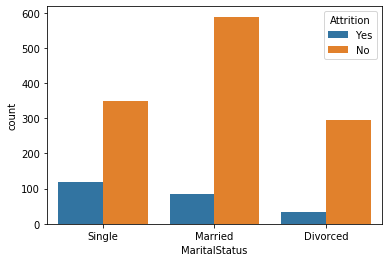

In [15]:
#EDA

sbn.countplot('MaritalStatus',hue='Attrition',data=hra)

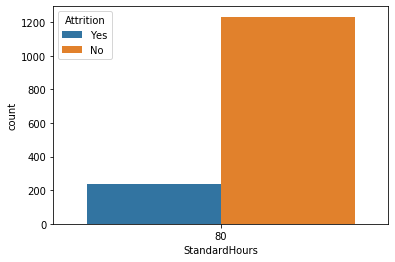

In [21]:
sbn.countplot('StandardHours',hue='Attrition',data=hra)

We can observe that standard hours are same for every row and as its not helpful, we can drop the column

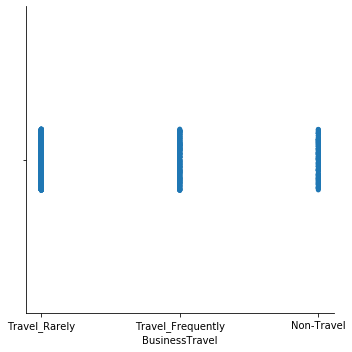

In [26]:
sbn.catplot('BusinessTravel',data=hra)

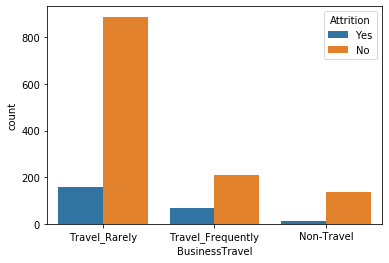

In [23]:
sbn.countplot('BusinessTravel',hue='Attrition',data=hra)

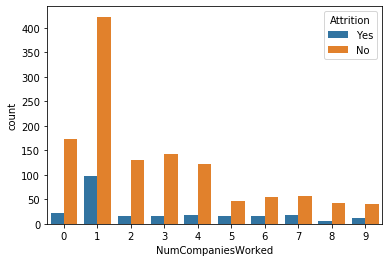

In [27]:
sbn.countplot('NumCompaniesWorked',data=hra,hue='Attrition')

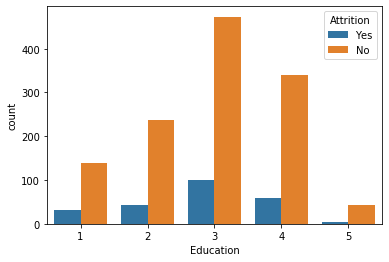

In [28]:
sbn.countplot('Education',hue='Attrition',data=hra)

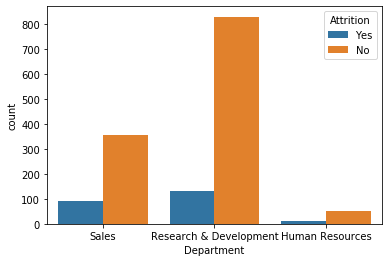

In [32]:
sbn.countplot('Department',hue='Attrition',data=hra)

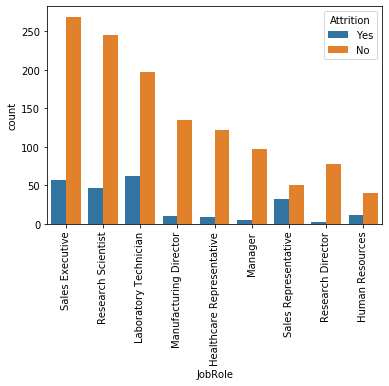

In [37]:
sbn.countplot('JobRole',hue='Attrition',data=hra)
plt.xticks(rotation=90)
plt.show()

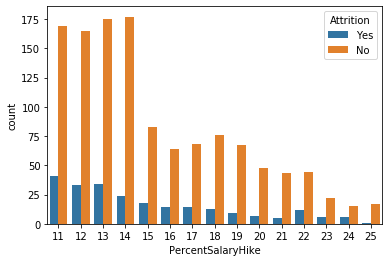

In [49]:
sbn.countplot('PercentSalaryHike',hue='Attrition',data=hra)

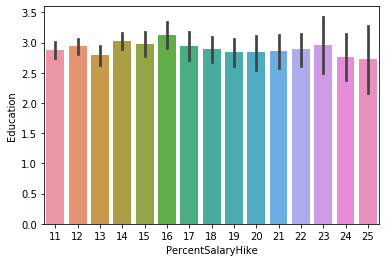

In [52]:
sbn.barplot('PercentSalaryHike','Education',data=hra)

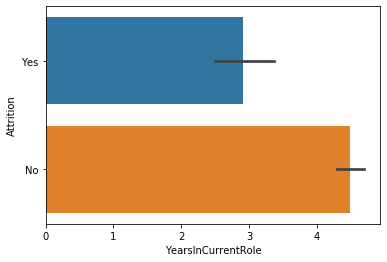

In [53]:
sbn.barplot('YearsInCurrentRole','Attrition',data=hra)

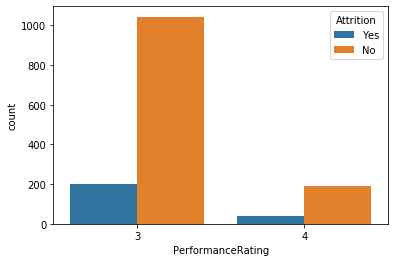

In [54]:
sbn.countplot('PerformanceRating',hue='Attrition',data=hra)

In [57]:
hra.groupby(['Attrition'])['JobSatisfaction'].value_counts()

Attrition  JobSatisfaction
No         4                  407
           3                  369
           2                  234
           1                  223
Yes        3                   73
           1                   66
           4                   52
           2                   46
Name: JobSatisfaction, dtype: int64

In [58]:
hra.groupby(['Attrition'])['WorkLifeBalance'].value_counts()

Attrition  WorkLifeBalance
No         3                  766
           2                  286
           4                  126
           1                   55
Yes        3                  127
           2                   58
           4                   27
           1                   25
Name: WorkLifeBalance, dtype: int64

In [59]:
hra.groupby(['Attrition'])['YearsWithCurrManager'].value_counts()

Attrition  YearsWithCurrManager
No         2                       294
           7                       185
           0                       178
           3                       123
           8                        97
           4                        87
           1                        65
           9                        58
           5                        27
           6                        25
           10                       24
           11                       21
           12                       18
           13                       14
           17                        7
           15                        5
           14                        3
           16                        2
Yes        0                        85
           2                        50
           7                        31
           3                        19
           1                        11
           4                        11
           8                    

In [60]:
#By considering above observations there are some columns which are not helpful for analyzing factors for attrition,lets drop them.
#We can drop EmployeeCount,standardhours
hra.drop(columns=['EmployeeCount','StandardHours'],inplace=True)

In [61]:
hra.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [10]:
#Check for null values
hra.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

It seems there are no null values

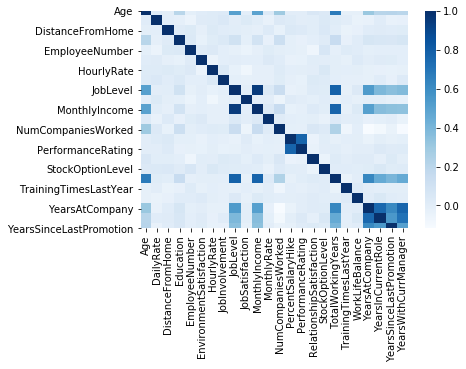

In [63]:
sbn.heatmap(hra.corr(),cmap='Blues')

In [64]:
hra.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [65]:
hra.shape

(1470, 33)

In [77]:
hra.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [81]:
for col in hra.columns.values:
    if hra[col].dtypes=='object':
        print(hra[col].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: Over

In [90]:
hra.dtypes.loc[hra.dtypes=='object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [91]:
hrax=hra.drop("Attrition",axis=1)

In [92]:
hrax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [99]:
hray=pd.DataFrame(hra['Attrition'])

In [100]:
hray.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


In [101]:
hray.shape

(1470, 1)

In [102]:
type(hray)

pandas.core.frame.DataFrame

In [103]:
hrax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [104]:
#Lets check the skewness of the features

hrax.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [110]:
#Treating skewness 

for index in hrax.skew().index:
    if hrax.skew().loc[index]>0.55:
        hrax[index]=np.log1p(hrax[index])
    if hrax.skew().loc[cols]<-0.55:
        hrax[index]=np.square(hrax[index])

In [111]:
hrax.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [112]:
hrax.dtypes.loc[hrax.dtypes=='object']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [114]:
from sklearn.preprocessing import LabelEncoder
hrax=pd.get_dummies(hrax,drop_first=True)

In [115]:
hrax.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,1,2,94,3,1.098612,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,2,3,61,2,1.098612,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,4,92,2,0.693147,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,5,4,56,3,0.693147,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,7,1,40,3,0.693147,2,...,1,0,0,0,0,0,0,1,0,0


In [118]:
#Encoding with label encoder to avoid complexity
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
hray=le.fit_transform(hray)

In [120]:
hray

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [121]:
#Scaling the feature set ,so that model performance is not affected by the weight of features

from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
sclx=scl.fit_transform(hrax)
sclx=pd.DataFrame(sclx,columns=hrax.columns)

In [122]:
sclx.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.505350,-0.891688,-1.701283,-0.660531,1.383138,0.379672,0.112298,1.153254,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,0.252002,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,0.112298,-0.660853,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-1.031607,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-1.094180,0.246200,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.695482,1.061787,-1.694636,1.169781,-0.486709,0.379672,-1.094180,0.246200,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


In [130]:
#Seperating train test and finding maximum accuracy,random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(hrax,hray,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst



In [131]:
lor=LogisticRegression()
accuracy(lor,sclx,hray)

Accuracy is 0.8919753086419753 for the random state 40
Accuracy is 0.8950617283950617 for the random state 41
Accuracy is 0.904320987654321 for the random state 42
Accuracy is 0.8487654320987654 for the random state 43
Accuracy is 0.8703703703703703 for the random state 44
Accuracy is 0.8395061728395061 for the random state 45
Accuracy is 0.8580246913580247 for the random state 46
Accuracy is 0.8796296296296297 for the random state 47
Accuracy is 0.8919753086419753 for the random state 48
Accuracy is 0.8827160493827161 for the random state 49
Accuracy is 0.8549382716049383 for the random state 50
Accuracy is 0.9012345679012346 for the random state 51
Accuracy is 0.8827160493827161 for the random state 52
Accuracy is 0.9074074074074074 for the random state 53
Accuracy is 0.8641975308641975 for the random state 54
Accuracy is 0.9012345679012346 for the random state 55
Accuracy is 0.8919753086419753 for the random state 56
Accuracy is 0.8796296296296297 for the random state 57
Accuracy is

93

In [134]:
kn=KNeighborsClassifier(n_neighbors=3)
accuracy(kn,sclx,hray)



Accuracy is 0.8024691358024691 for the random state 40
Accuracy is 0.8024691358024691 for the random state 41
Accuracy is 0.7932098765432098 for the random state 42
Accuracy is 0.7808641975308642 for the random state 43
Accuracy is 0.8240740740740741 for the random state 44
Accuracy is 0.7530864197530864 for the random state 45
Accuracy is 0.7808641975308642 for the random state 46
Accuracy is 0.7993827160493827 for the random state 47
Accuracy is 0.7993827160493827 for the random state 48
Accuracy is 0.7993827160493827 for the random state 49
Accuracy is 0.7870370370370371 for the random state 50
Accuracy is 0.8117283950617284 for the random state 51
Accuracy is 0.8209876543209876 for the random state 52
Accuracy is 0.8055555555555556 for the random state 53
Accuracy is 0.7901234567901234 for the random state 54
Accuracy is 0.8240740740740741 for the random state 55
Accuracy is 0.8209876543209876 for the random state 56
Accuracy is 0.8271604938271605 for the random state 57
Accuracy i

67

In [136]:
rfc=RandomForestClassifier(n_estimators=10)
accuracy(rfc,sclx,hray)

Accuracy is 0.8487654320987654 for the random state 40
Accuracy is 0.8734567901234568 for the random state 41
Accuracy is 0.8703703703703703 for the random state 42
Accuracy is 0.8209876543209876 for the random state 43
Accuracy is 0.8518518518518519 for the random state 44
Accuracy is 0.8024691358024691 for the random state 45
Accuracy is 0.8179012345679012 for the random state 46
Accuracy is 0.8549382716049383 for the random state 47
Accuracy is 0.8611111111111112 for the random state 48
Accuracy is 0.8672839506172839 for the random state 49
Accuracy is 0.8302469135802469 for the random state 50
Accuracy is 0.8549382716049383 for the random state 51
Accuracy is 0.8580246913580247 for the random state 52
Accuracy is 0.8641975308641975 for the random state 53
Accuracy is 0.8333333333333334 for the random state 54
Accuracy is 0.8641975308641975 for the random state 55
Accuracy is 0.8487654320987654 for the random state 56
Accuracy is 0.8518518518518519 for the random state 57
Accuracy i

67

In [ ]:
#Fitting the best model



In [139]:
from sklearn.metrics import confusion_matrix,classification_report
lor=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(sclx,hray,random_state=93,test_size=.22)
lor.fit(x_train,y_train)
predy=lor.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is',acc)
print('confusion matrix',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))

Accuracy is 0.9197530864197531
confusion matrix [[271   7]
 [ 19  27]]
Classification report               precision    recall  f1-score   support

           0       0.93      0.97      0.95       278
           1       0.79      0.59      0.68        46

    accuracy                           0.92       324
   macro avg       0.86      0.78      0.81       324
weighted avg       0.91      0.92      0.91       324



In [144]:
#Crossvalidating

from sklearn.model_selection import cross_val_score
cv=cross_val_score(lor,x_train,y_train,cv=5,scoring='accuracy')
print('mean accuracy:',cv.mean())
print("standard deviation",cv.std())


mean accuracy: 0.8630149990506929
standard deviation 0.01658502099948929


In [146]:
#saving predictions to csv

pred=pd.DataFrame(predy,columns=['hray'])
pred.head()

,hray
0,0
1,0
2,1
3,0
4,0


In [147]:
predy

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [148]:
predy=pd.DataFrame(predy,columns=['Attrition'])
predy.head()

,Attrition
0,0
1,0
2,1
3,0
4,0


In [ ]:
predy.to_csv('Attritonprediction.csv',index=False)

In [150]:
#Saving the model

import pickle

pickle_file='attrition.pkl'
with open (pickle_file,'wb') as file:
    pickle.dump(lor,file)